In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import pandas as pd
import skimage.io as io

/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


(800, 2)


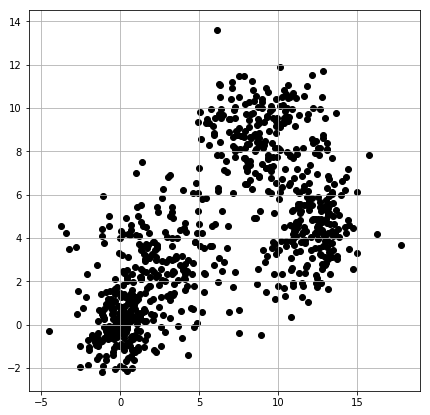

In [7]:
#creating the Dataset
mean1=np.array([0.1,0.0])
mean2=np.array([12.0,4.5])
mean3=np.array([9.0,9.0])
mean4=np.array([3.0,3.0])
cov1=np.array([[1.0,0.0],
      [0.5,1.0]])
cov2 =np.array([[2.5,0.5],
                [0.5,2.3]])
cov3 = np.array([[4.5,0.0],
                [0.0,2.0]])
cov4 = np.array([[5.6,0.0],
                [0.0,3.2]])

data1=np.random.multivariate_normal(mean1,cov1,200)
data2=np.random.multivariate_normal(mean2,cov2,200)
data3=np.random.multivariate_normal(mean3,cov3,200)
data4=np.random.multivariate_normal(mean4,cov4,200)
X=np.concatenate((data1,data2,data3,data4),axis=0)
print X.shape



#plotting the DataSet
plt.figure(0,figsize=(7,7))
plt.grid("on")

plt.scatter(data1[:,0],data1[:,1],color='black')
plt.scatter(data2[:,0],data2[:,1],color='black')
plt.scatter(data3[:,0],data3[:,1],color='black')
plt.scatter(data4[:,0],data4[:,1],color='black')
plt.show()

In [8]:
k= 4
clusters = {}
colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']
for kx in range(k):
    clusters[kx] = {
        'points': [],
        'center': 10.0*(np.random.random((X.shape[1],))*2 - 1),
        'color': colors[kx]
    }

#print clusters

In [9]:
def eucladian_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

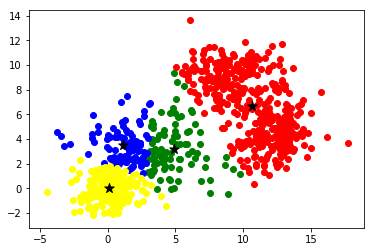

In [29]:
#alloting the points to clusters
for ix in range(X.shape[0]):
    dist=[]
    for jx in range(k):
        dist.append(eucladian_distance(X[ix],clusters[jx]['center']))
    clusterId=np.argmin(dist)
    clusters[clusterId]['points'].append(X[ix])
#shifting the point to a betterplace:mean of its cluster
for kx in range(k):
    pts = np.asarray(clusters[kx]['points'])
    if pts.shape[0] > 0:
        new_center = pts.mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['points'] = pts
    clusters[kx]['center'] = new_center
#print clusters

#displaying the custers (not a part of algorithm only for visual undrstanding)
plt.figure(0)
for kx in range(k):
    cc = clusters[kx]['center']
    pts = clusters[kx]['points']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass    
    plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
    clusters[kx]['points'] = []
plt.show()